# Example: REV analysis for permeability

This example demonstrates how to perform REV analysis for permeability, calculated using FDMSS solver.

In [1]:
from julia.api import Julia
jl = Julia(compiled_modules=False)
from revanalyzer import REVAnalyzer
from revanalyzer.generators import generate_permeability_fdmss
from revanalyzer.metrics import Permeability

Permeability for subcuts is generated using the external application. So, instead of using generate() method from REVAnalyzer class, one needs to run generator function generate_permeability_fdmss. This function computes
permeability value (in mD) for each subcube, given by parameters 'cut_step' and 'sREV_max_size'. The results are saved in the same way as for the metrics generated inside REVAnalizer library.

In [2]:
#input data for generator function

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed.
datadir = 'data' # path to the folder containing image, default: 'data'
outputdir = 'output' # path to the output folder containing generated data, default: 'output'
exe_path_fdmss = '/home/azubov/fdmss/fdmss' #path to fdmss exe file
directions = 'x' #could be 'x', 'y', 'z' or 'all'. If label of this parameter is 'all', permeability values are
                 #generated for all 3 possible flow directions.
n_threads = 48 #number of CPU cores used by FDMSS, default: 1
resolution = 1. #resolution of studied sample (micrometers), default: 1.
show_time = True #default: False. Added to monitor time cost for large images.
generate_permeability_fdmss(image, size, cut_step, sREV_max_size, exe_path_fdmss, directions, n_threads, 
                            resolution, datadir, outputdir, show_time)

FMDSS run time 
--- 309.82651686668396 seconds ---
Extraction time for cuts with l =  50
--- 0.005919933319091797 seconds ---
Extraction time for cuts with l =  100
--- 0.03452491760253906 seconds ---
Extraction time for cuts with l =  150
--- 0.10110664367675781 seconds ---
Extraction time for cuts with l =  200
--- 0.23049688339233398 seconds ---
Extraction time for cuts with l =  250
--- 0.060538530349731445 seconds ---


In [3]:
#metric and analyzer inizialization. 
#Note, that 'outputdir' should be the same as in generator function to have access to generated data for subcubes. 
all_directions = False #flag indicating if generation over 3 flow directions was done by external generator.
                       #It must be False, if in generator function input directions = 'x', 'y' or 'z'. 
                       #It must be True, if directions = 'all'. Default: True.

metric = Permeability(all_directions)

analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size, datadir, outputdir)

In [4]:
#Check out if we can read the data generated by external generator.
cut_size = 50
cut_id = 1
value = analyzer.read(cut_size, cut_id)
print(value)

2356.3768303560005


In [5]:
#fix thresholds and analyze generated data
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [6]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{300: 618.786972033546, 50: 757.2950010997033, 100: 601.8035601361516, 150: 644.6894082219605, 200: 657.7122103342977, 250: 629.7588688576865}
{50: 592.9797855452621, 100: 116.27974599395245, 150: 85.30455487209069, 200: 52.94009312604504}
{50: 0.7830235042937937, 100: 0.19321877385977143, 150: 0.13231884033485025, 200: 0.08049127307388287}
100
100
100


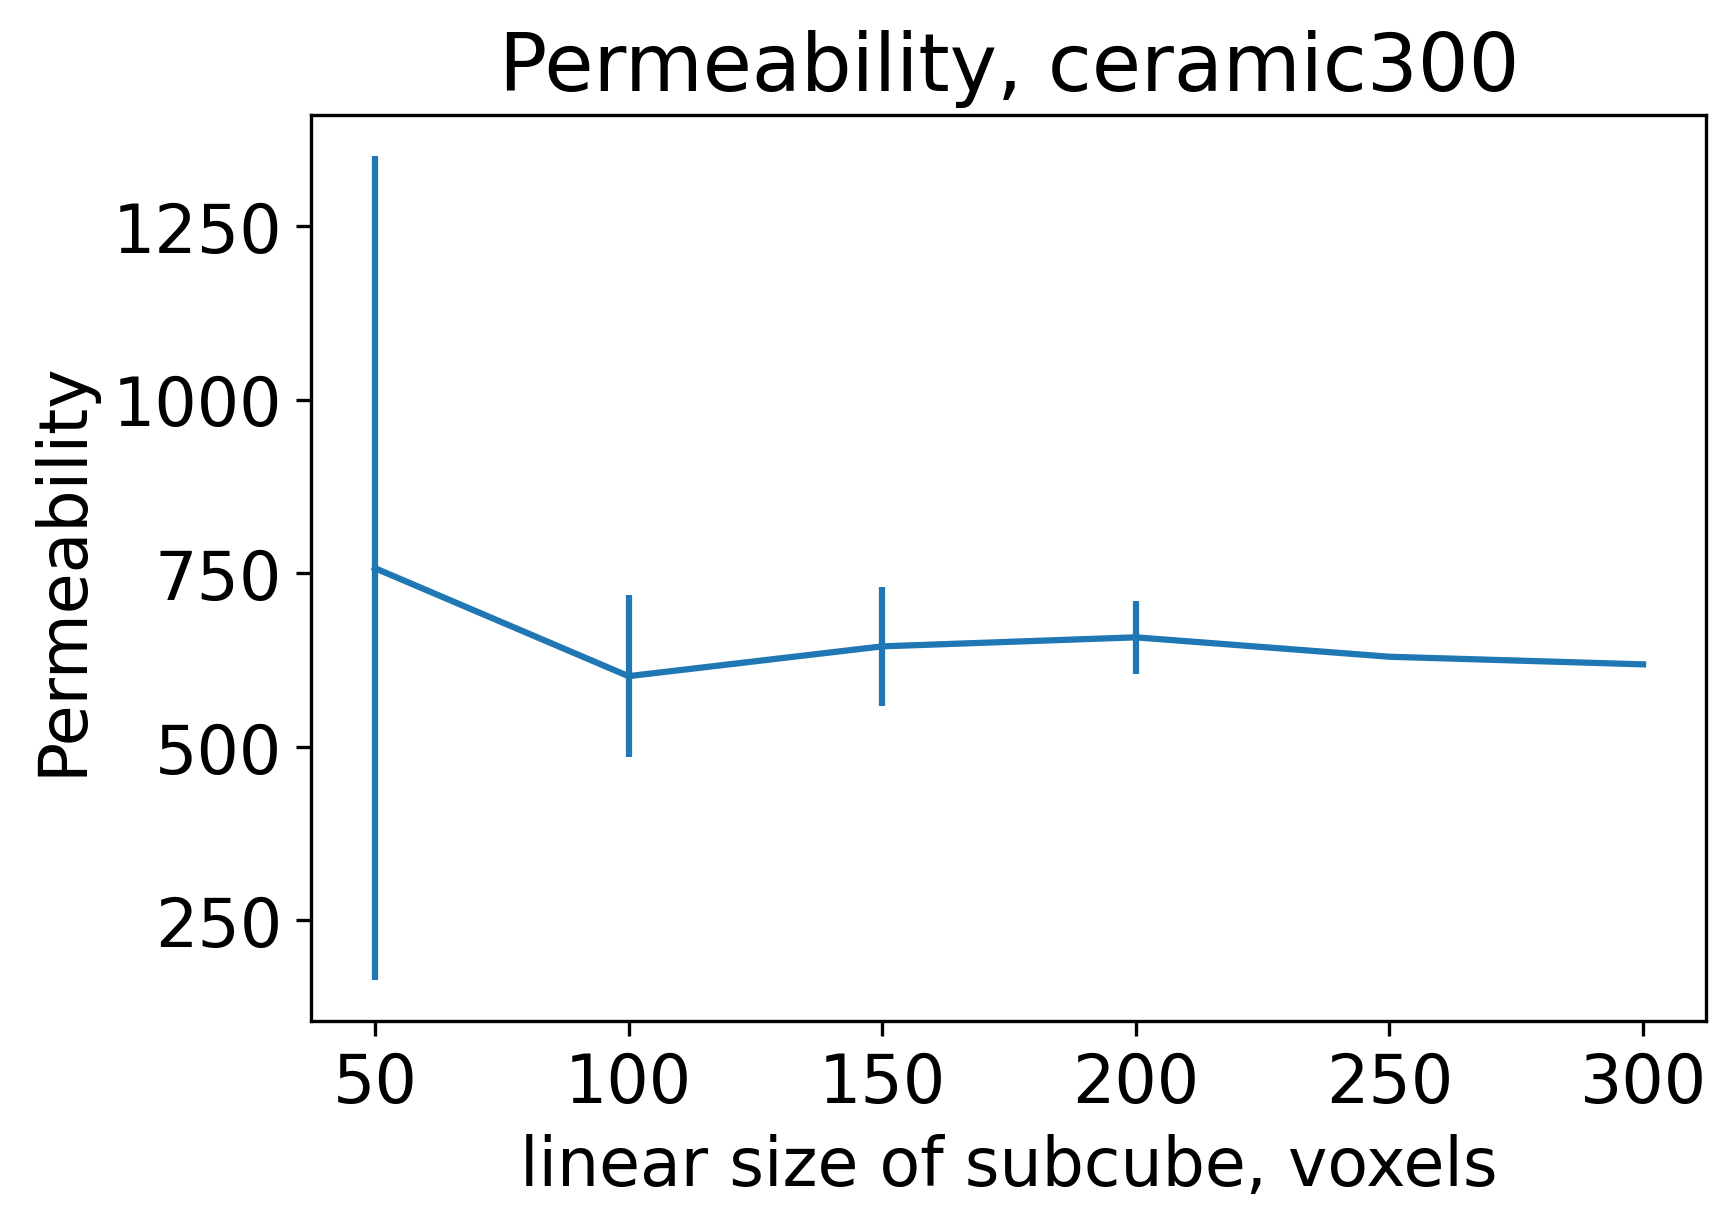

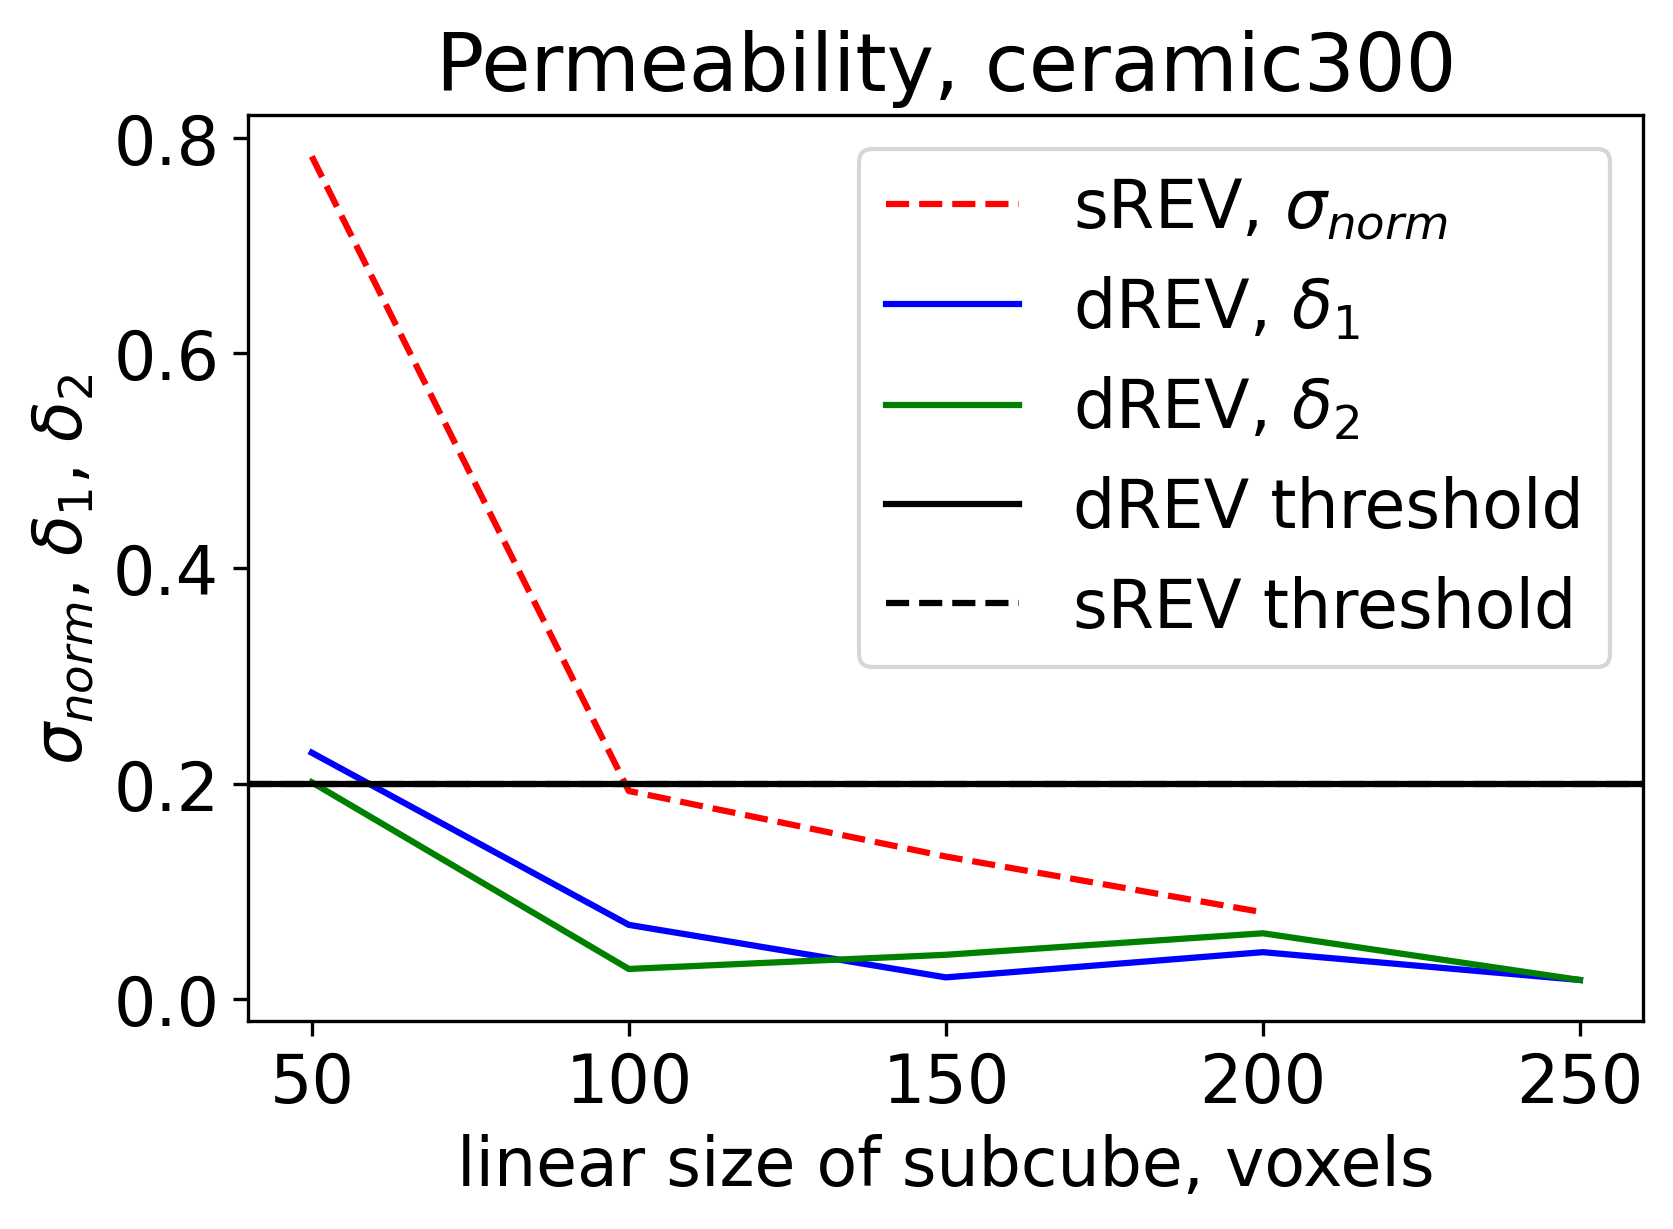

In [7]:
analyzer.show_results()

In [8]:
#Now, we can generate permeability data in 3 flow directions.
directions = 'all'
generate_permeability_fdmss(image, size, cut_step, sREV_max_size, exe_path_fdmss, directions, n_threads, 
                            resolution, datadir, outputdir, show_time)

FMDSS run time 
--- 295.1972887516022 seconds ---
Extraction time for cuts with l =  50
--- 0.006102561950683594 seconds ---
Extraction time for cuts with l =  100
--- 0.03460049629211426 seconds ---
Extraction time for cuts with l =  150
--- 0.10123085975646973 seconds ---
Extraction time for cuts with l =  200
--- 0.22761225700378418 seconds ---
Extraction time for cuts with l =  250
--- 0.06185507774353027 seconds ---
FMDSS run time 
--- 271.8437054157257 seconds ---
Extraction time for cuts with l =  50
--- 0.006691455841064453 seconds ---
Extraction time for cuts with l =  100
--- 0.033759117126464844 seconds ---
Extraction time for cuts with l =  150
--- 0.09862184524536133 seconds ---
Extraction time for cuts with l =  200
--- 0.2098402976989746 seconds ---
Extraction time for cuts with l =  250
--- 0.057611703872680664 seconds ---
FMDSS run time 
--- 301.74536395072937 seconds ---
Extraction time for cuts with l =  50
--- 0.006182432174682617 seconds ---
Extraction time for cut

In [9]:
#Then flag all_direction must be True.
all_directions = True
metric = Permeability(all_directions)

analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size, datadir, outputdir)

In [10]:
#Now we have 3 metric values for each subcube, correpoding to x, y and z directions.
cut_size = 50
cut_id = 1
value = analyzer.read(cut_size, cut_id)
print(value)

[2356.371957981731, 1697.3939456858077, 1701.5036566453268]


In [12]:
analyzer.analyze(dREV_threshold, sREV_threshold)
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{300: [618.786972033546, 526.6781659482783, 506.09330351178096], 50: [757.2944547663905, 558.1018404689925, 593.9045976387602], 100: [601.8035337570944, 507.1543042669125, 475.53486788990205], 150: [644.6894098438758, 542.9160030181764, 515.4173240328503], 200: [657.7122065985563, 558.9152694097374, 531.8431345865656], 250: [629.7588688576865, 539.5492685905814, 522.3436344435635]}
{50: [592.9783276703307, 456.3387007857833, 432.7866945241374], 100: [116.27970603838898, 127.03292897846882, 84.16364999497334], 150: [85.30456485368015, 54.72576929258964, 51.04104635577159], 200: [52.94007961392809, 32.54233358136009, 31.035875414304268]}
{50: 0.8176620603908168, 100: 0.25048181176751305, 150: 0.13231885548474936, 200: 0.08049125298694783}
150
100
50


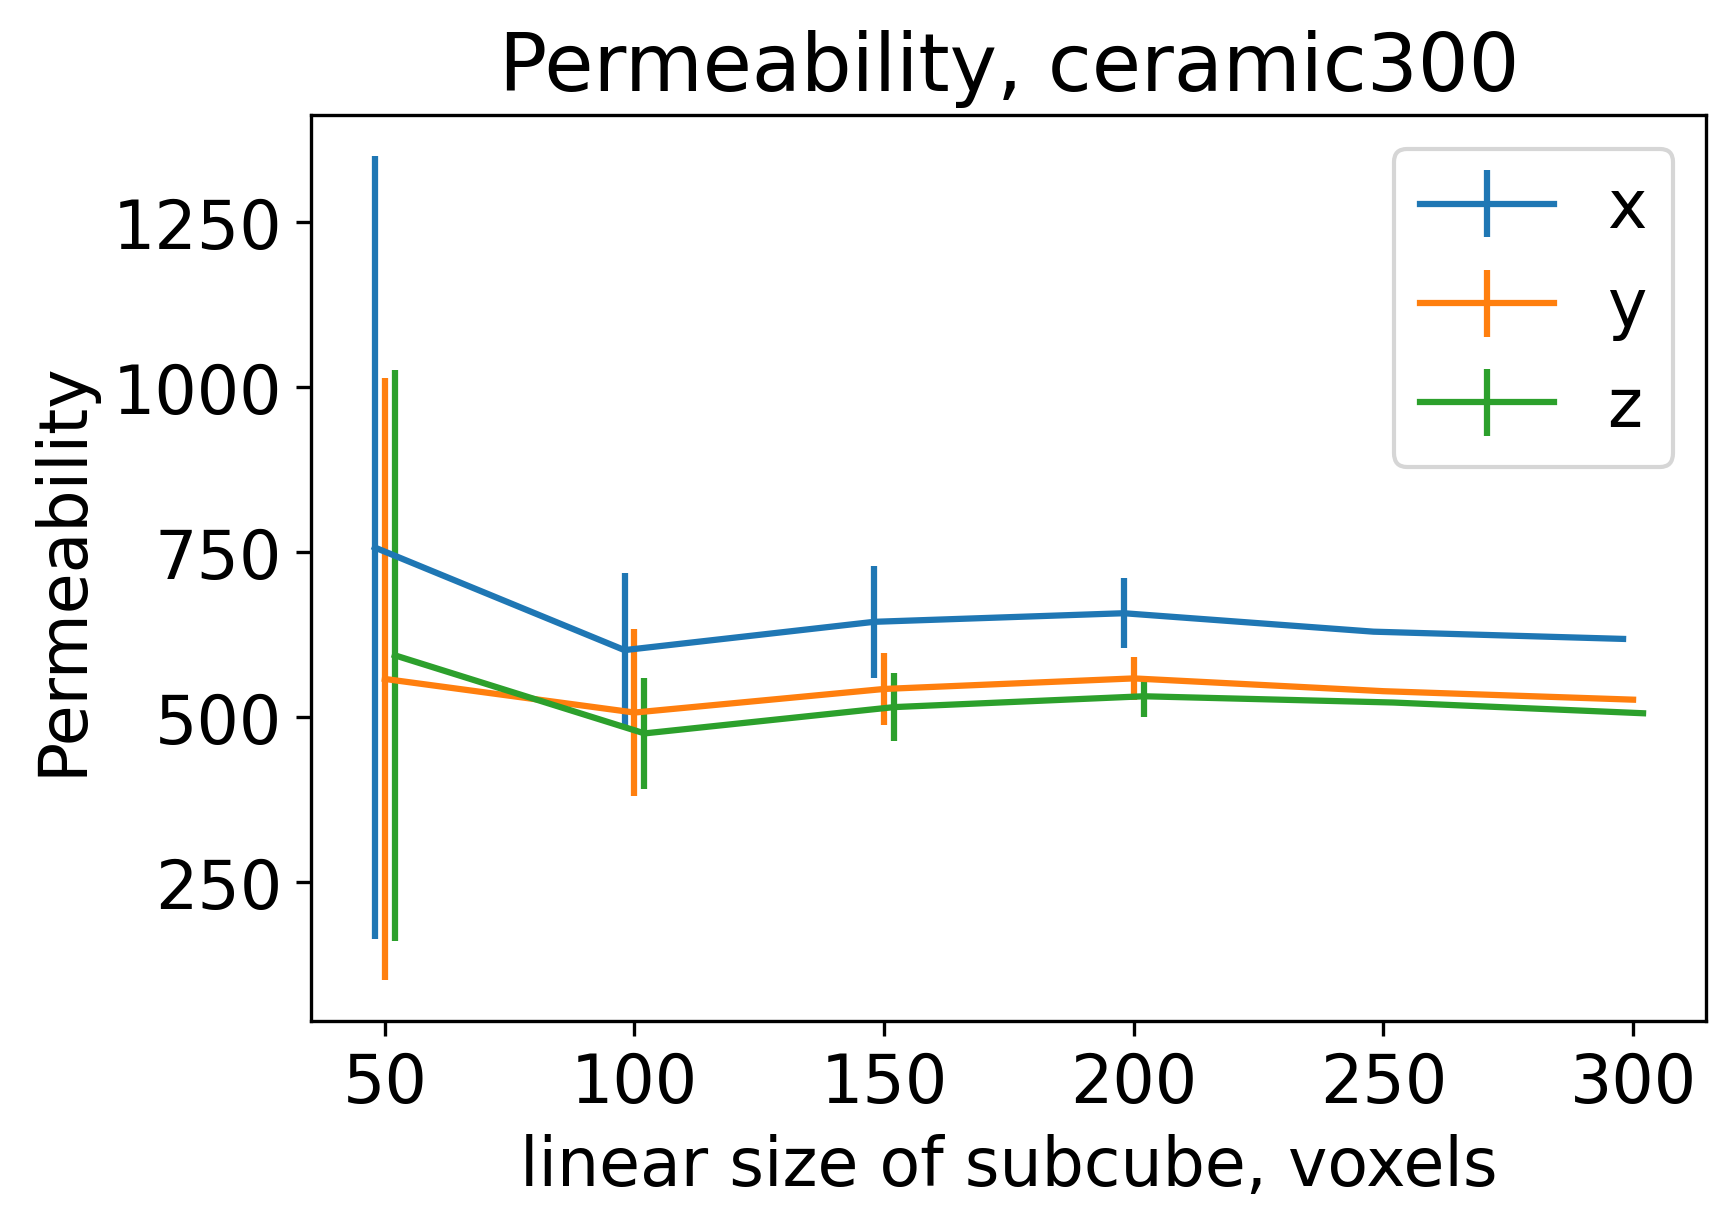

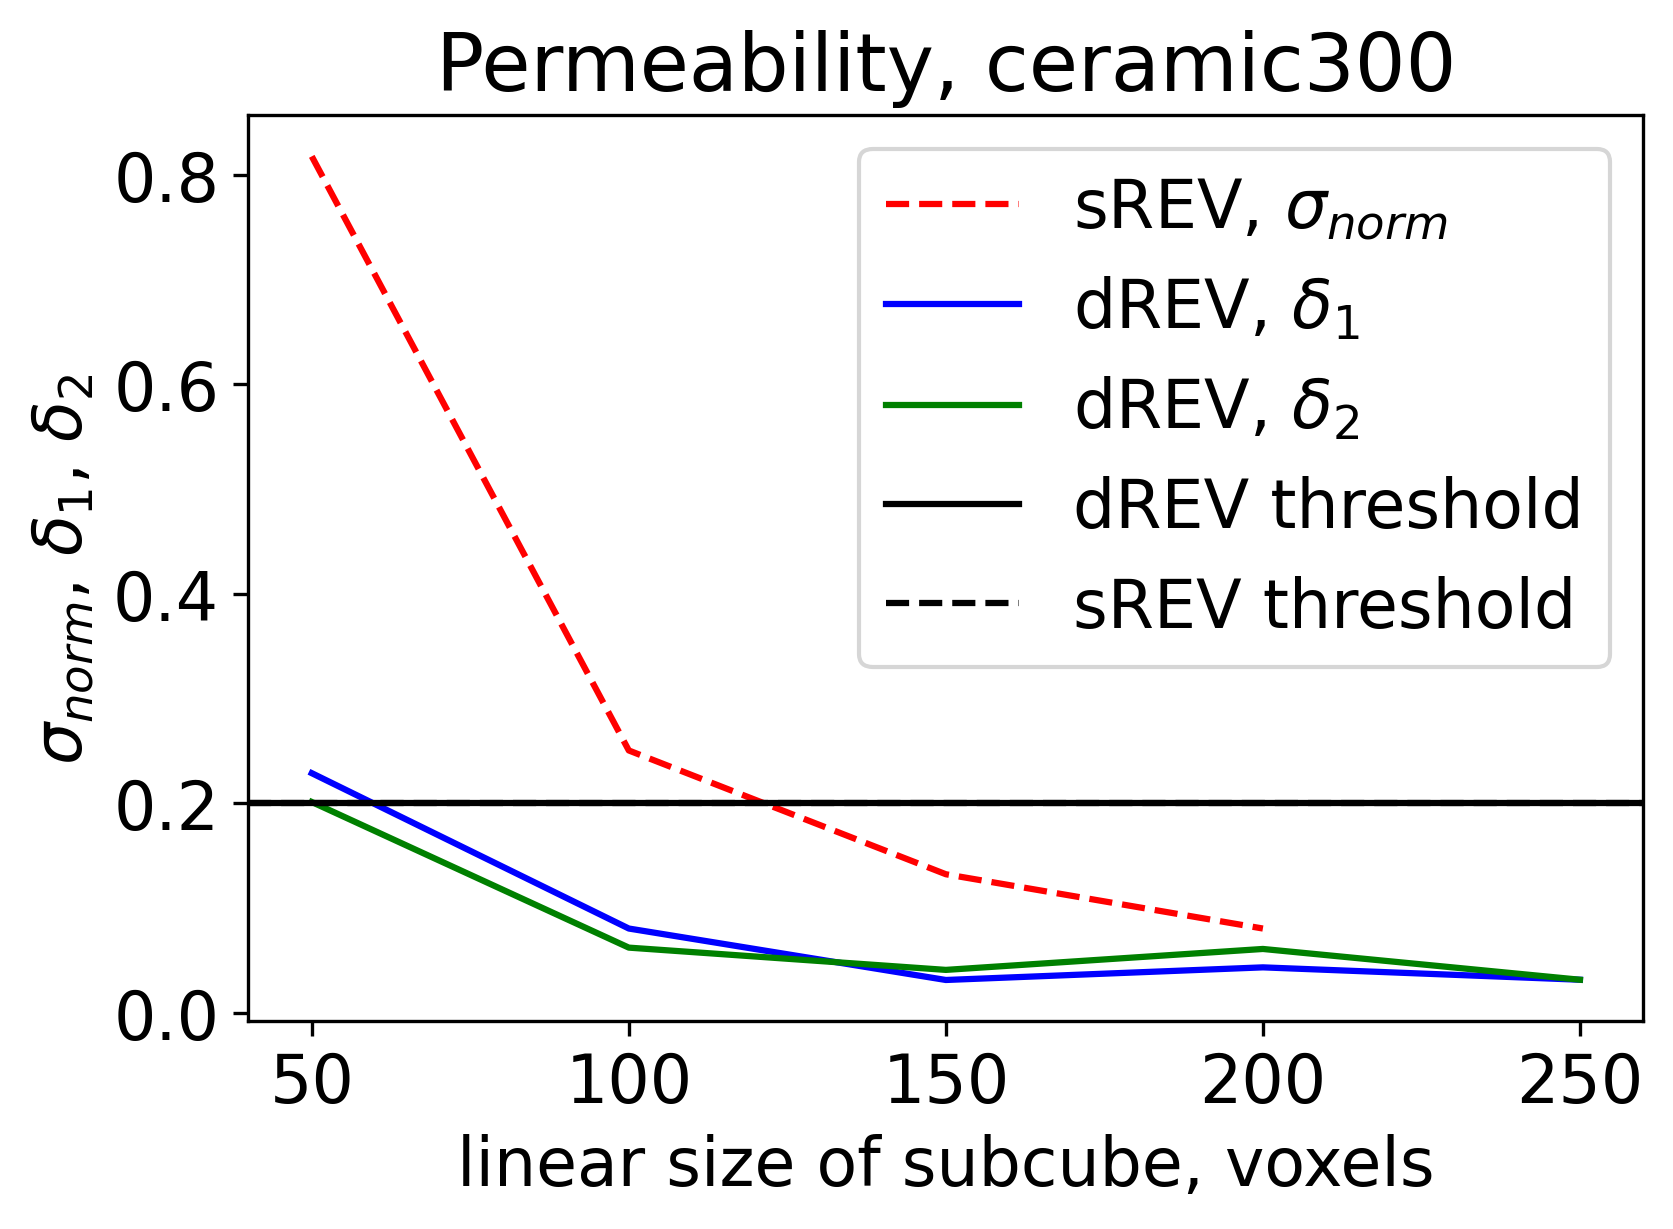

In [13]:
analyzer.show_results()